Dataset Overview:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  

Missing Values:
step              0
type              0
amount            0
nameOrig  

<ipython-input-2-d30a288bc3b1>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['type'] = LabelEncoder().fit_transform(X['type'])



Accuracy Score:
0.9990476190476191

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12573
         1.0       1.00      0.56      0.71        27

    accuracy                           1.00     12600
   macro avg       1.00      0.78      0.86     12600
weighted avg       1.00      1.00      1.00     12600


Confusion Matrix:
[[12573     0]
 [   12    15]]

ROC AUC Score:
0.9995051123660047

Feature Importances:
          Feature  Importance
2          amount    0.255956
3   oldbalanceOrg    0.213838
6  newbalanceDest    0.198132
5  oldbalanceDest    0.170145
0            step    0.081973
1            type    0.057243
4  newbalanceOrig    0.022712


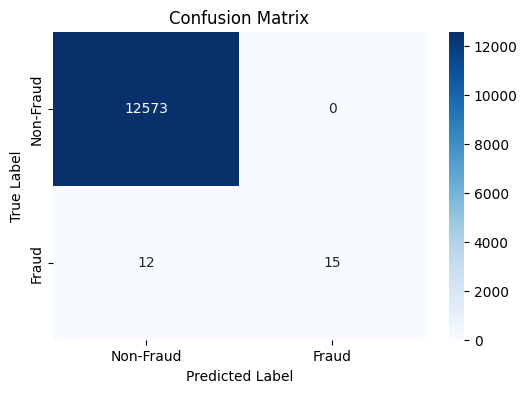

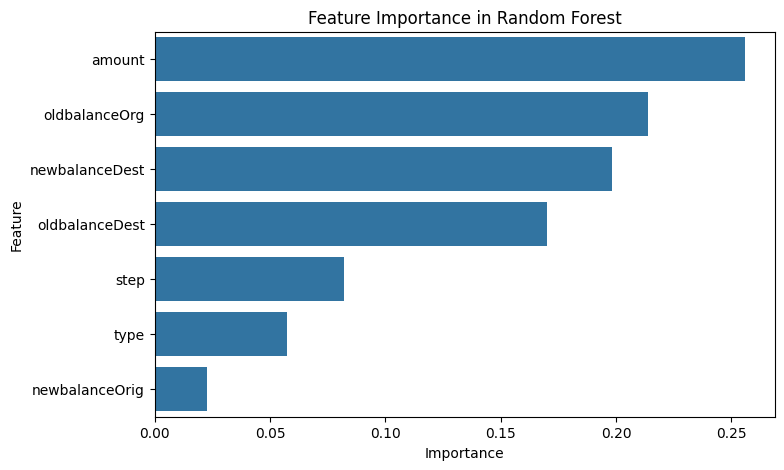

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Load dataset
data = pd.read_csv("/content/onlinefraud.csv")

# Display dataset overview
print("Dataset Overview:")
print(data.head())

print("\nMissing Values:")
print(data.isnull().sum())

# Handle missing values in the target variable
data = data.dropna(subset=['isFraud'])  # Drop rows with NaN in 'isFraud'

# Features and target separation
X = data[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y = data['isFraud']

# Encode the 'type' categorical variable
X['type'] = LabelEncoder().fit_transform(X['type'])

# Splitting the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Model training: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model prediction
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # For ROC AUC score

# Evaluation metrics
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_pred_proba))

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

# Visualizations
# Confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance in Random Forest')
plt.show()
